# Lag tester

This notebook is expected to plot the errors of prediction of 3 ML models for several "lagmax". The lagmax correspond to the number of previous days we use to feed models. The graphs shows that it is optimal for lagmax in (13,14).

In [2]:
%run simple_model_trainer.ipynb
from tqdm import tqdm

In [3]:
def estimator(df):
    dico={}
    cols = df.drop("Prices", axis =1).columns
    for col in cols : 
        df[col + "_error"] = ((df["Prices"] - df[col])**2)/2
        dico[col + "_error"] = df[col + "_error"].mean()/df["Prices"].mean()
    return dico
    

In [4]:
estimator(simple_model_trainer("GOOGL"))

{'pred_SVR linear_error': 0.03831377676404558,
 'pred_ridge _error': 0.051613153097743794,
 'pred_lasso_error': 0.04970890776272977}

Avancement: 100%|██████████| 10/10 [06:39<00:00, 39.99s/it]


<AxesSubplot:xlabel='lag'>

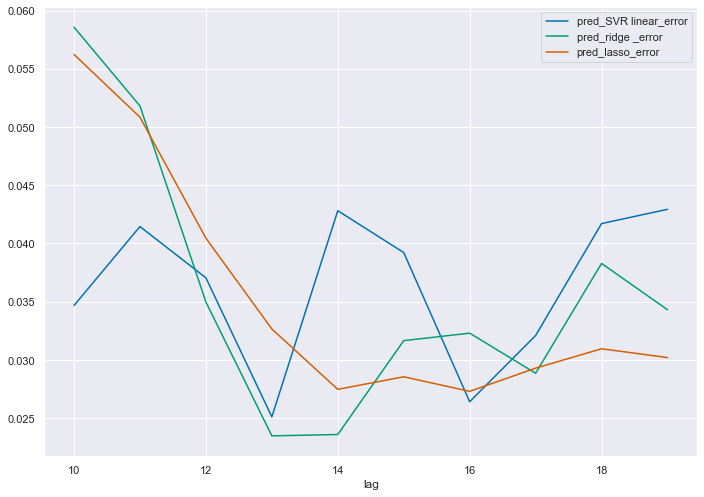

In [5]:
lagmin, lagmax = 10, 20
lucas = pd.DataFrame(estimator(simple_model_trainer("GOOGL", lagmax = i)) for i in tqdm(range(lagmin,lagmax),desc ="Avancement"))
lucas["lag"] = [i for i in range(lagmin,lagmax)]
lucas.set_index("lag").plot()
    